In [53]:
import os
from instagrapi import Client

TARGET_DATE = os.getenv("TARGET_DATE")
ACCOUNT_USERNAME = os.getenv("INSTAGRAM_USERNAME")
ACCOUNT_PASSWORD = os.getenv("INSTAGRAM_PASSWORD")

cl = Client()
cl.login(ACCOUNT_USERNAME, ACCOUNT_PASSWORD)

user_id = cl.user_id_from_username(ACCOUNT_USERNAME)

In [54]:
user_id

'56880791156'

In [55]:
cl.account_info()

Account(pk='56880791156', username='sohxm_sxmxl', full_name='Soham Samal', is_private=True, profile_pic_url=HttpUrl('https://instagram.fblr14-1.fna.fbcdn.net/v/t51.2885-19/475850807_477209072102991_5532654912481139041_n.jpg?stp=dst-jpg_e0_s150x150_tt6&_nc_ht=instagram.fblr14-1.fna.fbcdn.net&_nc_cat=103&_nc_oc=Q6cZ2QHPVd6jI0F9WrpzpLytEElIpgSJIGNeHrht-oFSBNlUh7yzfJnGoW5fLtvYEoivrTM&_nc_ohc=KoK7ut60iZcQ7kNvwGcDIxh&_nc_gid=7oZfz24-9US1QS6OHS0hLg&edm=AJlpnE4BAAAA&ccb=7-5&ig_cache_key=GDfoXBxP7jnlBLIBAGEZQmNU8MdMbkULAAAB-ccb7-5&oh=00_AfPgbyzQXfW8hQXQ8f4e_LK-QFj2kMoIOms5NCktP6IvKw&oe=686CC897&_nc_sid=125e1d'), is_verified=False, biography='Nope…', external_url=None, is_business=False, birthday='2003-07-03', phone_number='+916370420345', gender=3, email='sohamsamal37@gmail.com')

In [56]:
inbox = cl.direct_threads(amount=1)

ValidationError: 1 validation error for MediaXma
preview_url
  Input should be a valid URL, input is empty [type=url_parsing, input_value='', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/url_parsing

In [ ]:
# Timestamp
inbox[0].messages[0].timestamp.strftime("%Y-%m-%d %H:%M:%S").split()[0]

NameError: name 'inbox' is not defined

In [7]:
inbox = cl.direct_threads()

ValidationError: 1 validation error for MediaXma
preview_url
  Input should be a valid URL, input is empty [type=url_parsing, input_value='', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/url_parsing

In [ ]:
from utils.utils import is_message_from_date
target_msgs = []

for thread in inbox:
    # Shows whether read (0) or unread (1) using thread.read_state
    if thread.read_state == 1:
        for msg in thread.messages:
            if msg.user_id != cl.user_id_from_username(ACCOUNT_USERNAME):
                created_at = msg.timestamp
                if is_message_from_date(created_at, TARGET_DATE):
                    target_msgs.append({
                        "user_id": msg.user_id,
                        "thread_id": thread.id,
                        "text": msg.text,
                        "created_at": created_at.strftime("%Y-%m-%d %H:%M:%S"),
                    })

target_msgs

In [ ]:
class InstagramClient:
    """
    Handles login and message operations.
    """
    def __init__(self):
        self.cl = Client()
        self.cl.login(ACCOUNT_USERNAME, ACCOUNT_PASSWORD)

    def fetch_unread_msgs(self, target_date=TARGET_DATE, inbox_amount=20):
        """
        Fetch unread messages on the target date.
        """
        inbox = self.cl.direct_threads(amount=inbox_amount)
        target_msgs = []

        for thread in inbox:
            # Shows whether read (0) or unread (1) using thread.read_state
            if thread.read_state == 1:
                for msg in thread.messages:
                    if msg.user_id != cl.user_id_from_username(ACCOUNT_USERNAME):
                        created_at = msg.timestamp
                        if is_message_from_date(created_at, TARGET_DATE):
                            target_msgs.append({
                                "user_id": msg.user_id,
                                "thread_id": thread.id,
                                "text": msg.text,
                                "created_at": created_at.strftime("%Y-%m-%d %H:%M:%S"),
                            })
        return target_msgs

    def reply_to_dm(self, user_id, text):
        """
        Send a reply to a DM.
        """
        self.cl.direct_send(text, user_ids=[user_id])

In [ ]:
inbox[0]

DirectThread(pk='716104400037922', id='340282366841710301244258891121977124898', messages=[DirectMessage(id='32310788336124038862869471254544384', user_id='32023722652', thread_id=340282366841710301244258891121977124898, timestamp=datetime.datetime(2025, 7, 4, 1, 5, 45), item_type='text', is_sent_by_viewer=False, is_shh_mode=False, reactions=None, text='hiii pookie', reply=None, link=None, animated_media=None, media=None, visual_media=None, media_share=None, reel_share=None, story_share=None, felix_share=None, xma_share=None, clip=None, placeholder=None, client_context='7346622698670932249'), DirectMessage(id='32310642880480836756611124844036096', user_id='56880791156', thread_id=340282366841710301244258891121977124898, timestamp=datetime.datetime(2025, 7, 3, 22, 54, 20), item_type='xma_reel_mention', is_sent_by_viewer=True, is_shh_mode=False, reactions=None, text=None, reply=None, link=None, animated_media=None, media=None, visual_media=None, media_share=None, reel_share=None, story_s

In [ ]:
# Urvi's user_id
urvi_id = '32023722652'
urvi_thread_id = 340282366841710301244258891121977124898

In [9]:
text = "I love you, Urvi! ❤️"
cl.direct_send(text, user_ids=[urvi_id])

DirectMessage(id='32310928669226333983208519696908288', user_id='', thread_id=340282366841710301244258891121977124898, timestamp=datetime.datetime(2025, 7, 4, 3, 12, 32), item_type=None, is_sent_by_viewer=None, is_shh_mode=None, reactions=None, text=None, reply=None, link=None, animated_media=None, media=None, visual_media=None, media_share=None, reel_share=None, story_share=None, felix_share=None, xma_share=None, clip=None, placeholder=None, client_context='6800027271902574968')

In [3]:
import os
from dotenv import load_dotenv
from instagrapi import Client
from utils.utils import is_message_from_date

load_dotenv()

TARGET_DATE = os.getenv("TARGET_DATE")
ACCOUNT_USERNAME = os.getenv("INSTAGRAM_USERNAME")
ACCOUNT_PASSWORD = os.getenv("INSTAGRAM_PASSWORD")

print(ACCOUNT_USERNAME)

class InstagramClient:
    """
    Handles login and message operations.
    """
    def __init__(self):
        self.cl = Client()
        self.cl.login(ACCOUNT_USERNAME, ACCOUNT_PASSWORD)

    def fetch_unread_msgs(self, target_date=TARGET_DATE, inbox_amount=1):
        """
        Fetch unread messages on the target date.
        """
        inbox = self.cl.direct_threads(amount=inbox_amount)
        target_msgs = []

        for thread in inbox:
            # Shows whether read (0) or unread (1) using thread.read_state
            if thread.read_state == 1:
                for msg in thread.messages:
                    if msg.user_id != self.cl.user_id_from_username(ACCOUNT_USERNAME):
                        created_at = msg.timestamp
                        if is_message_from_date(created_at, TARGET_DATE) and msg.text != None:
                            target_msgs.append({
                                "user_id": msg.user_id,
                                "thread_id": thread.id,
                                "text": msg.text,
                                "created_at": created_at.strftime("%Y-%m-%d %H:%M:%S"),
                            })
        return target_msgs

    def reply_to_dm(self, user_id, text):
        """
        Send a reply to a DM.
        """
        self.cl.direct_send(text, user_ids=[user_id])

myClient = InstagramClient()
print(myClient.fetch_unread_msgs())


sohxm_sxmxl
[{'user_id': '32023722652', 'thread_id': '340282366841710301244258891121977124898', 'text': '😚😚😚😚😚', 'created_at': '2025-07-03 22:17:03'}]


In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from src.instagram import InstagramClient
from src.llm import llm
from utils.utils import load_processed, save_processed

class State(TypedDict):
    messages: Annotated[list, add_messages]

instagram_client = InstagramClient()


sohxm_sxmxl


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sohxm_sxmxl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sohxm_sxmxl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sohxm_sxmxl/?__a=1&__d=dis) >>> 


[{'user_id': '32023722652', 'thread_id': '340282366841710301244258891121977124898', 'text': '😚😚😚😚😚', 'created_at': '2025-07-03 22:17:03'}]


In [43]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List, Dict, Any
from src.instagram import InstagramClient
from src.llm import llm
from utils.utils import load_processed, save_processed

class AgentState(TypedDict):
    """State for the LangGraph agent"""
    messages: List[Dict[str, Any]]
    current_message: Dict[str, Any]
    is_birthday_message: bool
    reply_text: str
    processed_count: int

class Agent:
    """
    Orchestrates fetching, generating and replying.
    """
    def __init__(self):
        self.instagram_client = InstagramClient()
        self.llm = llm
        self.processed = load_processed()
        self.graph = self._build_graph()

    def _build_graph(self):
        """Build the LangGraph workflow"""
        graph = StateGraph(AgentState)

        # Add nodes
        graph.add_node("fetch_messages", self.fetch_messages)
        graph.add_node("check_birthday", self.check_birthday_message)
        graph.add_node("generate_reply", self.generate_birthday_reply)
        graph.add_node("send_reply", self.send_reply)
        graph.add_node("skip_message", self.skip_message)  # Add this node

        # Add edges
        graph.add_edge(START, "fetch_messages")
        graph.add_conditional_edges(
            "fetch_messages",
            self.has_messages_to_process,
            {
                "process": "check_birthday",
                "end": END
            }
        )
        graph.add_conditional_edges(
            "check_birthday",
            self.is_birthday_condition,
            {
                "birthday": "generate_reply",
                "not_birthday": "skip_message"  # Route to skip_message instead
            }
        )
        graph.add_edge("generate_reply", "send_reply")
        graph.add_edge("send_reply", "fetch_messages")  # Continue to next message
        graph.add_edge("skip_message", "fetch_messages")  # Continue to next message

        return graph.compile()

    def skip_message(self, state: AgentState) -> AgentState:
        """Skip the current message and move to the next one"""
        user_id = state["current_message"]["user_id"]
        print(f"⏭️ Skipping non-birthday message from user {user_id}")

        # Mark as processed even though we're not replying
        self.processed.add(user_id)
        save_processed(self.processed)

        # Move to next message
        state["processed_count"] += 1
        return state

    def fetch_messages(self, state: AgentState) -> AgentState:
        """Fetch unread messages from Instagram"""
        if not state.get("messages"):
            # First time fetching messages
            try:
                # messages = self.instagram_client.fetch_unread_msgs()
                messages = [
                    {
                        "user_id": '32023722652',
                        "thread_id": 340282366841710301244258891121977124898,
                        "text": "Happy birthday baby! you mean the world to me.",
                        "created_at": "2025-07-03 14:30:25",
                    },
                    {
                        "user_id": '56880791156',
                        "thread_id": 340282366841710301244258891121977124898,
                        "text": "Happy birthday! oiiiii",
                        "created_at": "2025-07-03 14:30:25",
                    },
                    {
                        "user_id": '56880791156',
                        "thread_id": 340282366841710301244258891121977124898,
                        "text": "How are you, let's play basketball",
                        "created_at": "2025-07-03 09:15:42",
                    }
                ]
                # Filter out already processed messages and messages without text
                unprocessed_messages = [
                    msg for msg in messages
                    if msg["user_id"] not in self.processed and msg.get("text") is not None and msg.get("text").strip() != ""
                ]
                state["messages"] = unprocessed_messages
                state["processed_count"] = 0
            except Exception as e:
                print(f"Error fetching messages: {e}")
                state["messages"] = []
                state["processed_count"] = 0

        # Get next message to process
        if state["processed_count"] < len(state["messages"]):
            state["current_message"] = state["messages"][state["processed_count"]]
        else:
            state["current_message"] = None

        return state

    def has_messages_to_process(self, state: AgentState) -> str:
        """Check if there are more messages to process"""
        if (state.get("current_message") and
            state["processed_count"] < len(state.get("messages", []))):
            return "process"
        return "end"

    def check_birthday_message(self, state: AgentState) -> AgentState:
        """Check if the current message is a birthday message"""
        message_text = state["current_message"]["text"]

        # Use LLM to determine if it's a birthday message
        birthday_keywords = ["birthday", "happy birthday", "bday", "celebrate", "wishes", "many more"]

        # Simple keyword check (you can enhance this with LLM)
        is_birthday = any(keyword.lower() in message_text.lower() for keyword in birthday_keywords)

        # Or use LLM for more sophisticated detection
        prompt = f"Is this message a birthday wish or birthday-related? Respond with only 'yes' or 'no': '{message_text}'"
        llm_response = self.llm.invoke(prompt)
        is_birthday = llm_response.content.lower().strip() == "yes"

        state["is_birthday_message"] = is_birthday
        return state

    def is_birthday_condition(self, state: AgentState) -> str:
        """Conditional edge for birthday messages"""
        return "birthday" if state["is_birthday_message"] else "not_birthday"

    def generate_birthday_reply(self, state: AgentState) -> AgentState:
        """Generate a suitable birthday reply using LLM"""
        original_message = state["current_message"]["text"]

        prompt = f"""
        Generate a warm and personalized birthday reply to this message: "{original_message}"

        Guidelines:
        - Keep it friendly and genuine
        - Make it feel personal, not automated
        - Keep it concise (1-2 sentences)
        - Match the tone of the original message

        Reply:
        """

        reply = self.llm.invoke(prompt)
        state["reply_text"] = reply.content.strip()
        return state

    def send_reply(self, state: AgentState) -> AgentState:
        """Send the generated reply via Instagram DM"""
        user_id = state["current_message"]["user_id"]
        reply_text = state["reply_text"]

        try:
            self.instagram_client.reply_to_dm(user_id, reply_text)
            print(f"Sending reply to user {user_id}: {reply_text}")

            # Mark as processed
            self.processed.add(user_id)
            save_processed(self.processed)

            print(f"✅ Sent birthday reply to user {user_id}: {reply_text}")

        except Exception as e:
            print(f"❌ Failed to send reply to user {user_id}: {str(e)}")

        # Move to next message
        state["processed_count"] += 1
        return state

    def run(self):
        """Run the agent workflow"""
        initial_state = {
            "messages": [],
            "current_message": None,
            "is_birthday_message": False,
            "reply_text": "",
            "processed_count": 0
        }

        print("🚀 Starting Instagram Birthday Reply Agent...")
        result = self.graph.invoke(initial_state)
        print("✅ Agent workflow completed!")
        return result

# # Usage
# if __name__ == "__main__":
#     agent = Agent()
#     agent.run()

In [44]:
agent = Agent()

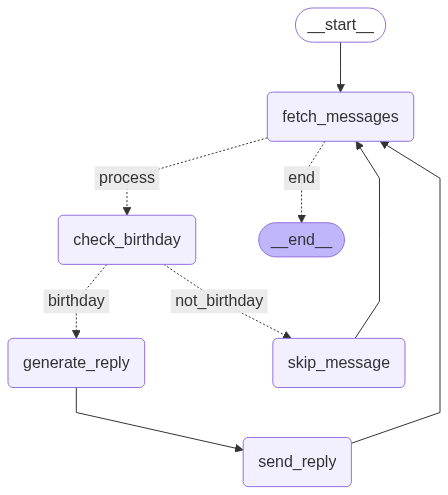

In [45]:
agent._build_graph()

In [47]:
agent.run()

🚀 Starting Instagram Birthday Reply Agent...
✅ Agent workflow completed!


{'messages': [],
 'current_message': None,
 'is_birthday_message': False,
 'reply_text': '',
 'processed_count': 0}